# Multimodal RAG Tutorial using GPT-4 and LlamaIndex

## Table of Contents
1. Introduction to Multimodal RAG
2. Setup and Installation
3. Preparing the Environment
4. Data Collection and Preparation
5. Building the Multimodal Index
6. Implementing Multimodal Retrieval
8. Multimodal RAG Querying


## 1. Introduction to Multimodal RAG

Multimodal Retrieval-Augmented Generation (RAG) is an advanced technique that combines text and image data to enhance the capabilities of large language models (LLMs) like GPT-4. This tutorial will guide you through the process of implementing a multimodal RAG system using GPT-4 and LlamaIndex.

### How Multimodal RAG Works

Multimodal RAG extends traditional text-based RAG by incorporating image data:

1. **Indexing**: Both text and images are processed and stored in separate vector stores.
2. **Retrieval**: When a query is received, relevant text and images are retrieved based on similarity.
3. **Augmentation**: The retrieved information is used to augment the input to the LLM.
4. **Generation**: The LLM generates a response based on the augmented input.


## 2. Setup and Installation
First, we need to install the required dependencies. We'll use a virtual environment to keep our project isolated.


In [ ]:
!pip install llama-index-embeddings-clip

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
%pip install llama-index-multi-modal-llms-gemini

  Using cached llama_index_multi_modal_llms_gemini-0.1.8-py3-none-any.whl.metadata (774 bytes)
  Using cached llama_index_llms_gemini-0.1.12-py3-none-any.whl.metadata (735 bytes)
  Using cached google_generativeai-0.5.4-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_ai_generativelanguage-0.6.4-py3-none-any.whl.metadata (5.6 kB)
Using cached llama_index_multi_modal_llms_gemini-0.1.8-py3-none-any.whl (4.1 kB)
Using cached llama_index_llms_gemini-0.1.12-py3-none-any.whl (5.0 kB)
Using cached google_generativeai-0.5.4-py3-none-any.whl (150 kB)
Using cached google_ai_generativelanguage-0.6.4-py3-none-any.whl (679 kB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.6
    Uninstalling google-ai-generativelanguage-0.6.6:
      Successfully uninstalled google-ai-generativelanguage-0.6.6
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.7.2
    Uninstalling google-gen

In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

  Using cached llama_index-0.10.65-py3-none-any.whl.metadata (11 kB)
  Using cached qdrant_client-1.11.0-py3-none-any.whl.metadata (10 kB)
  Using cached llama_index_agent_openai-0.2.9-py3-none-any.whl.metadata (729 bytes)
  Using cached llama_index_cli-0.1.13-py3-none-any.whl.metadata (1.5 kB)
  Using cached grpcio_tools-1.65.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.3 kB)
  Using cached portalocker-2.10.1-py3-none-any.whl.metadata (8.5 kB)
INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
  Using cached h2-4.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached hyperframe-6.0.1-py3-none-any.whl.metadata (2.7 kB)
  Using cached hpack-4.0.0-py3-none-any.whl.metadata (2.5 kB)
Using cached qdrant_client-1.11

In [ ]:
# Create a virtual environment
# python -m venv multimodal_rag_env

# Activate the virtual environment
# On Windows:
# multimodal_rag_env\Scripts\activate
# On macOS and Linux:
# source multimodal_rag_env/bin/activate

# Install required packages
# %pip install llama-index-multi-modal-llms-gemini
# %pip install llama-index-vector-stores-qdrant
# %pip install llama-index-embeddings-gemini
# %pip install llama-index-llms-gemini
# !pip install llama-index-multi-modal-llms-openai
!pip install llama-index-multi-modal-llms-gemini
!pip install llama-index-vector-stores-qdrant
!pip install llama_index ftfy regex tqdm
!pip install torch torchvision
!pip install matplotlib scikit-image
!pip install -U qdrant_client

  Using cached llama_index_vector_stores_qdrant-0.2.16-py3-none-any.whl.metadata (768 bytes)
Using cached llama_index_vector_stores_qdrant-0.2.16-py3-none-any.whl (11 kB)


## 3. Preparing the Environment
Now, let's set up our Python environment and configure the OpenAI API key.

In [ ]:
import os
import requests
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

# # Set your OpenAI API key

# from google.colab import userdata

# OPENAI_API_KEY = userdata.get('OPENAI_API_KEY') #"your_api_key_here"
# os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY



import os

GOOGLE_API_KEY = ""  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:
# Create necessary directories
input_image_path = Path("input_images")
data_path = Path("mixed_wiki")

for path in [input_image_path, data_path]:
    if not path.exists():
        Path.mkdir(path)

print("Environment prepared successfully!")

Environment prepared successfully!


#### Example Images

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj" -O ./input_images/long_range_spec.png
!wget "https://docs.google.com/uc?export=download&id=19pLwx0nVqsop7lo0ubUSYTzQfMtKJJtJ" -O ./input_images/model_y.png
!wget "https://docs.google.com/uc?export=download&id=1utu3iD9XEgR5Sb7PrbtMf1qw8T1WdNmF" -O ./input_images/performance_spec.png
!wget "https://docs.google.com/uc?export=download&id=1dpUakWMqaXR4Jjn1kHuZfB0pAXvjn2-i" -O ./input_images/price.png
!wget "https://docs.google.com/uc?export=download&id=1qNeT201QAesnAP5va1ty0Ky5Q_jKkguV" -O ./input_images/real_wheel_spec.png

--2024-08-19 13:47:55--  https://docs.google.com/uc?export=download&id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download [following]
--2024-08-19 13:47:55--  https://drive.usercontent.google.com/download?id=1nUhsBRiSWxcVQv8t8Cvvro8HJZ88LCzj&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160684 (157K) [image/png]
Saving to: ‘./input_images/long_range_spec.png’

./input_images/long 100%[===================>] 156.92K  --.-KB/s    in 0.02s   


#### Let's look at the images

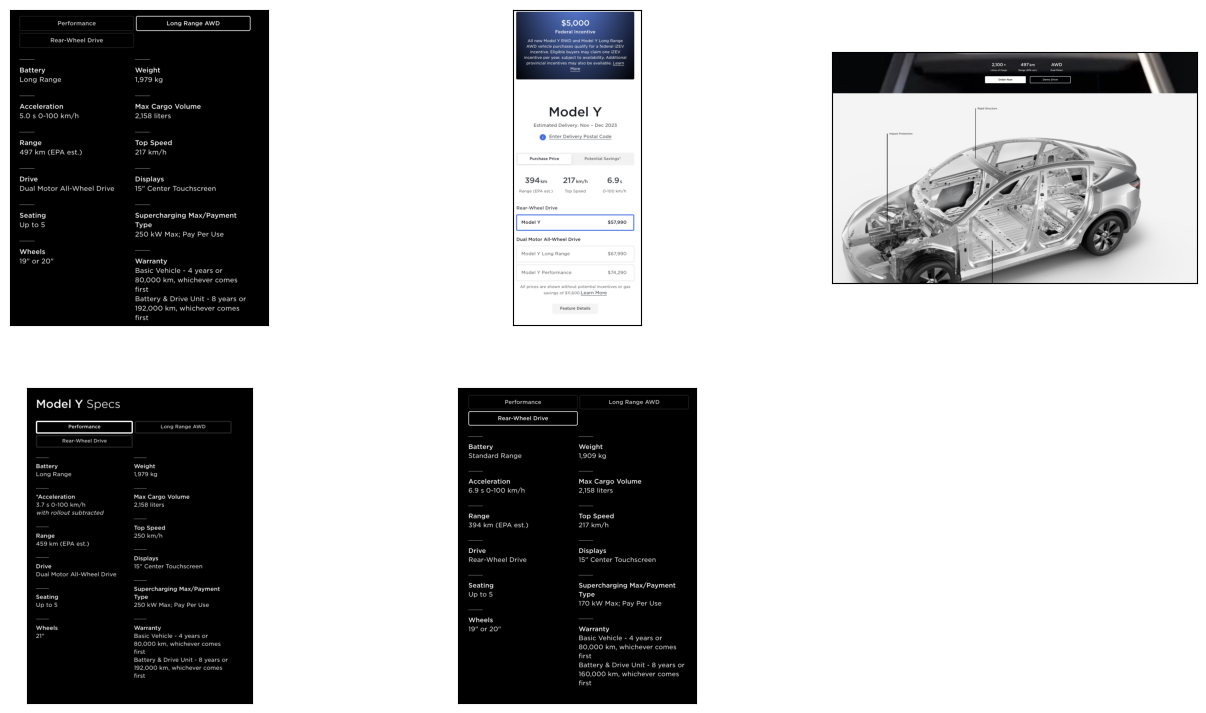

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

### Genereate text descriptions for images using GPT-4o

In [ ]:
# from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

# openai_mm_llm = OpenAIMultiModal(
#     model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1500
# )

gemini_pro = GeminiMultiModal(model_name="models/gemini-1.5-pro")

response_1 = gemini_pro.complete(
    prompt="Generate detailed text description for each image.",
    image_documents=image_documents,
)

print(response_1)

## Image Descriptions:

**Image 1:** This image shows the technical specifications for the Long Range AWD version of the Tesla Model Y. 

**Key details:**

* **Battery:** Long Range
* **Weight:** 1,979 kg
* **Acceleration:** 5.0 seconds 0-100 km/h
* **Max Cargo Volume:** 2,158 liters
* **Range:** 497 km (EPA est.)
* **Top Speed:** 217 km/h
* **Drive:** Dual Motor All-Wheel Drive
* **Displays:** 15" Center Touchscreen
* **Seating:** Up to 5
* **Supercharging Max/Payment Type:** 250 kW Max; Pay Per Use
* **Wheels:** 19" or 20"
* **Warranty:** 
    * Basic Vehicle - 4 years or 80,000 km, whichever comes first
    * Battery & Drive Unit - 8 years or 192,000 km, whichever comes first

**Image 2:** This image showcases a cutaway view of the Tesla Model Y's structural design, highlighting its safety features.

**Key features:**

* **Rigid Structure:** The car's frame is built for strength and rigidity.
* **Impact Protection:** Designated crumple zones are visible, designed to absorb impact en

## 4. Data Collection and Preparation
In this section, we'll collect text and image data from Wikipedia and other sources.

In [ ]:
def get_wikipedia_images(title):
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "imageinfo",
            "iiprop": "url|dimensions|mime",
            "generator": "images",
            "gimlimit": "50",
        },
    ).json()
    image_urls = []
    for page in response["query"]["pages"].values():
        if page["imageinfo"][0]["url"].endswith((".jpg", ".png")):
            image_urls.append(page["imageinfo"][0]["url"])
    return image_urls


In [ ]:
# List of Wikipedia titles to fetch
wiki_titles = {
    "Tesla Model Y",
    "Tesla Model X",
    "Tesla Model 3",
    "Tesla Model S",
    "Kia EV6",
    "BMW i3",
    "Audi e-tron",
    "Ford Mustang",
    "Porsche Taycan",
    "Rivian",
    "Polestar",
}


In [ ]:
# Fetch text and images
import urllib

image_uuid = 0
MAX_IMAGES_PER_WIKI = 20

for title in wiki_titles:
    # Fetch text
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True,
        },
    ).json()
    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    with open(data_path / f"{title}.txt", "w") as fp:
        fp.write(wiki_text)

    # Fetch images
    images_per_wiki = 0
    list_img_urls = get_wikipedia_images(title)

    for url in list_img_urls:
        if url.endswith((".jpg", ".png", ".svg")):
            image_uuid += 1
            urllib.request.urlretrieve(
                    url, data_path / f"{image_uuid}.jpg"
                )
            images_per_wiki += 1
            if images_per_wiki >= MAX_IMAGES_PER_WIKI:
                break

print("Data collection completed!")

HTTPError: HTTP Error 429: Too many requests. Please comply with the User-Agent policy to get a higher rate limit: https://meta.wikimedia.org/wiki/User-Agent_policy

In [ ]:
!wget "https://www.dropbox.com/scl/fi/mlaymdy1ni1ovyeykhhuk/tesla_2021_10k.htm?rlkey=qf9k4zn0ejrbm716j0gg7r802&dl=1" -O ./mixed_wiki/tesla_2021_10k.htm


--2024-08-19 13:53:33--  https://www.dropbox.com/scl/fi/mlaymdy1ni1ovyeykhhuk/tesla_2021_10k.htm?rlkey=qf9k4zn0ejrbm716j0gg7r802&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ec1d9625bb1add72402788ad0.dl.dropboxusercontent.com/cd/0/inline/CY86WTA7uZzJR7In_sWXiDONygTfAt2_6vkb6xLNi_z9Sb-heAxGMyhXt00Y6wMmiejadduZwcFFf3jh4Xw2rS-nEZSyz_2JJ_oG_kDIp_X_MTd4vgw-H-PcWbp7iKvth3w/file?dl=1# [following]
--2024-08-19 13:53:35--  https://uc4ec1d9625bb1add72402788ad0.dl.dropboxusercontent.com/cd/0/inline/CY86WTA7uZzJR7In_sWXiDONygTfAt2_6vkb6xLNi_z9Sb-heAxGMyhXt00Y6wMmiejadduZwcFFf3jh4Xw2rS-nEZSyz_2JJ_oG_kDIp_X_MTd4vgw-H-PcWbp7iKvth3w/file?dl=1
Resolving uc4ec1d9625bb1add72402788ad0.dl.dropboxusercontent.com (uc4ec1d9625bb1add72402788ad0.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6057:15::a27d:

## 5. Building the Multimodal Index
Now that we have our data, let's build the multimodal index using LlamaIndex and Qdrant as our vector store.

In [ ]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-f5ml3yva
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-f5ml3yva
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=5f4adcbfc3a0d951b8c3fcc435be59889eb9e9bb4ba58fe2e7366f9dc6de1659
  Stored in directory: /tmp/pip-ephem-wheel-cache-x18sm6su/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!pip install llama-index-embeddings-gemini

In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext
import qdrant_client
from llama_index.core import Settings
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_gemini_3")

text_store = QdrantVectorStore(client=client, collection_name="text_collection")
image_store = QdrantVectorStore(client=client, collection_name="image_collection")

# Using the embedding model to Gemini
Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
Settings.llm = Gemini(api_key=GOOGLE_API_KEY)


storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("./mixed_wiki/").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    show_progress=True,
)

print("Multimodal index built successfully!")

Parsing nodes:   0%|          | 0/16 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/3444 [00:00<?, ?it/s]

Generating image embeddings:   0%|          | 0/12 [00:00<?, ?it/s]

Multimodal index built successfully!


In [ ]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

## 6. Implementing Multimodal Retrieval
Let's create a retriever engine that can fetch both text and images based on a query.

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

MAX_TOKENS = 50
retriever_engine = index.as_retriever(
    similarity_top_k=3, image_similarity_top_k=3
)

def retrieve_and_display(query):
    retrieval_results = retriever_engine.retrieve(query[:MAX_TOKENS])

    retrieved_images = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_images.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)

    if retrieved_images:
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(retrieved_images):
            plt.subplot(1, len(retrieved_images), i+1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
# retrieve_and_display("Tell me about electric cars")

**Node ID:** e65c162a-399a-4b70-b195-7afd5810f5e0<br>**Similarity:** 0.7085909818462354<br>**Text:** ">&#160;</span></p></td>
    <td colspan="2" style="background-color:rgba(0,0,0,0);word-break:break-word;vertical-align:bottom;text-align:center;"><p style="text-indent:0.0pt;font-size:8.5pt;margin...<br>

**Node ID:** f00c5bfa-dfee-48be-aec5-b7315ea40655<br>**Similarity:** 0.7070658491890398<br>**Text:** font-size:7.5pt;font-family:Times New Roman;">&#160;</span></p></td>
        <td style="background-color:rgba(207,240,252,1);word-break:break-word;vertical-align:bottom;"><p style="text-indent:0.0p...<br>

**Node ID:** ae9bb98b-9c8b-4ed5-b385-584a3e226f81<br>**Similarity:** 0.7069382277073446<br>**Text:** ">&#160;</span></p></td>
    <td style="background-color:rgba(0,0,0,0);word-break:break-word;vertical-align:bottom;"><p style="text-indent:0.0pt;font-size:5.0pt;margin-top:0.0pt;line-height:1.05;fo...<br>

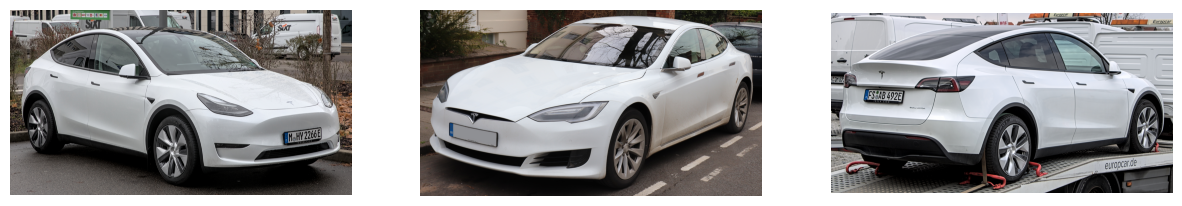

In [ ]:
retrieve_and_display("What is the best electric Sedan?")

## 7. Multimodal RAG Querying
Finally, let's implement a multimodal RAG query engine that can answer questions using both text and image data.

Answer: The provided text describes the Tesla Model S as a four-door sedan and Model X as a mid-size SUV. It doesn't mention anything about the Rivian R1. Therefore, I cannot provide a comparison of their design features. 


Sources:


**Node ID:** 156b6b55-1ba5-46a9-a316-e6e43ef641f4<br>**Similarity:** 0.7091291906634516<br>**Text:** We currently manufacture Model Y at the Fremont Factory and at Gigafactory Shanghai.</span></p>
  <p style="margin-left:4.533%;text-indent:0.0%;font-size:10.0pt;margin-top:14.0pt;line-height:1.15;f...<br>

**Node ID:** f9ed53fd-e31f-4ae5-bc76-9250dfc581e7<br>**Similarity:** 0.7076793065152083<br>**Text:** The efficiency of our solar energy products is aided by our own solar inverter, which also incorporates our power electronics technologies. We designed both products to integrate with Powerwall.</s...<br>

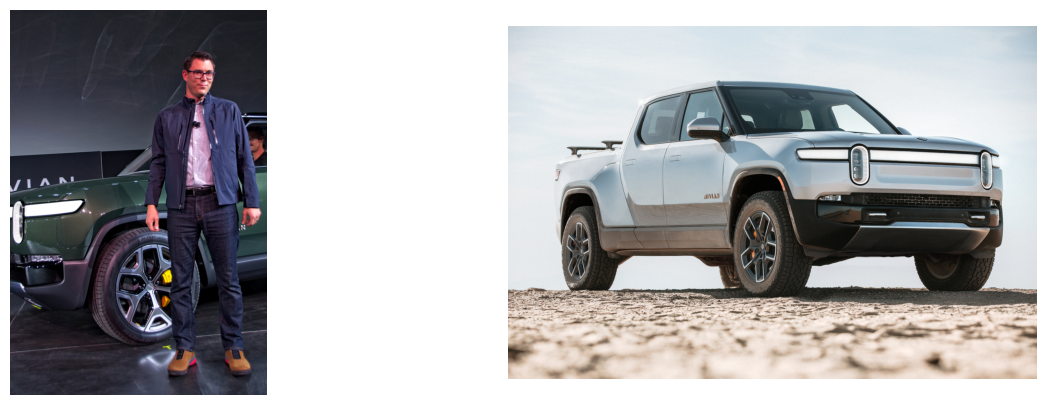

In [ ]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=gemini_pro, text_qa_template=qa_tmpl
)

def multimodal_rag_query(query_str):
    response = query_engine.query(query_str)
    print("Answer:", str(response))

    print("\nSources:")
    for text_node in response.metadata["text_nodes"]:
        display_source_node(text_node, source_length=200)

    if response.metadata["image_nodes"]:
        plt.figure(figsize=(15, 5))
        for i, img_node in enumerate(response.metadata["image_nodes"]):
            plt.subplot(1, len(response.metadata["image_nodes"]), i+1)
            img = Image.open(img_node.metadata["file_path"])
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
multimodal_rag_query("Compare the design features of Tesla Model S and Rivian R1")